In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, ConfusionMatrixDisplay, precision_score, recall_score

#### Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Summer 2024/424/Dataset/fake_job_postings.csv')
data.head(3)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
data.shape

(17880, 18)

#### Label Counts

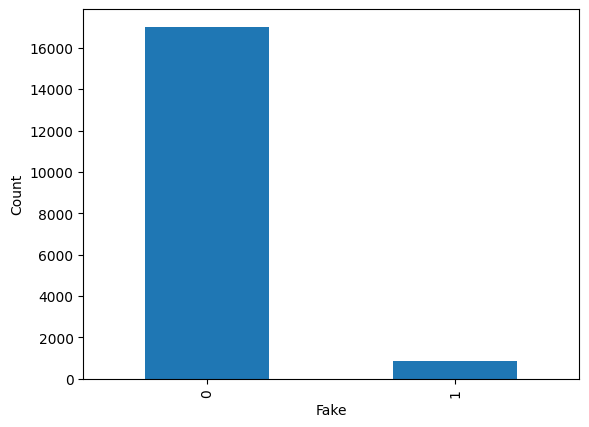

In [ ]:
count = data['fraudulent'].value_counts()
count.plot(kind='bar')
plt.xlabel('Fake')
plt.ylabel('Count')
plt.show()

In [ ]:
print(data.isnull().sum())

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


#### Remove Columns with large number of NA values

In [ ]:
data = data.drop(['job_id', 'salary_range', 'department'], axis=1)

In [ ]:
data.shape

(17880, 15)

#### Encode Textual data into numeric

In [ ]:
encoder = LabelEncoder()

data['title_encoded'] = encoder.fit_transform(data['title'])
data['location_encoded'] = encoder.fit_transform(data['location'])
data['company_profile_encoded'] = encoder.fit_transform(data['company_profile'])
data['description_encoded'] = encoder.fit_transform(data['description'])
data['requirements_encoded'] = encoder.fit_transform(data['requirements'])
data['benefits_encoded'] = encoder.fit_transform(data['benefits'])
data['industry_encoded'] = encoder.fit_transform(data['industry'])
data['function_encoded'] = encoder.fit_transform(data['function'])
data['employment_type_encoded'] = encoder.fit_transform(data['employment_type'])
data['required_experience_encoded'] = encoder.fit_transform(data['required_experience'])
data['required_education_encoded'] = encoder.fit_transform(data['required_education'])


data = data.drop(['title', 'location', 'company_profile', 'description', 'requirements', 'benefits', 'industry', 'function', 'employment_type', 'required_experience', 'required_education'], axis=1)

In [ ]:
nan_columns = ['location_encoded', 'requirements_encoded', 'benefits_encoded', 'company_profile_encoded', 'description_encoded', 'employment_type_encoded', 'required_experience_encoded', 'required_education_encoded', 'industry_encoded', 'function_encoded']
imputer = SimpleImputer(strategy='mean')
data[nan_columns] = imputer.fit_transform(data[nan_columns])

#### Correlation Matrix

<Axes: >

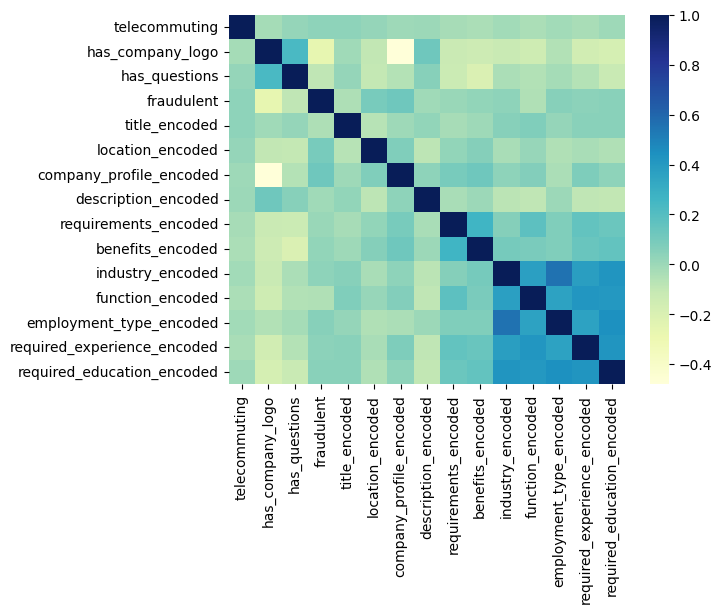

In [ ]:
data_corr = data.corr()

sns.heatmap(data_corr, cmap = 'YlGnBu')

In [ ]:
data.head(3)

,telecommuting,has_company_logo,has_questions,fraudulent,title_encoded,location_encoded,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded,industry_encoded,function_encoded,employment_type_encoded,required_experience_encoded,required_education_encoded
0,0,1,0,0,6043,2535.0,1526.0,4506.0,3829.0,6204.0,131.0,22.0,2.0,4.0,13.0
1,0,1,0,0,2183,1073.0,50.0,7255.0,10525.0,5569.0,75.0,7.0,1.0,6.0,13.0
2,0,1,0,0,1763,1867.0,1389.0,7470.0,4560.0,6204.0,131.0,37.0,5.0,7.0,13.0


In [ ]:
# Save Cleaned Data
data.to_csv('preprocessed_data.csv', index=False)


#### Split data for training and testing

In [ ]:
X = data.drop('fraudulent', axis=1)
y = data['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts()

,count
fraudulent,
0,13619
1,685


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Support Vector Machines

In [ ]:
svm_model = svm.SVC()
svm_model.fit(X_train_scaled, y_train)
svm_model_y_pred = svm_model.predict(X_test_scaled)
svm_model_a = accuracy_score(y_test, svm_model_y_pred)
print(f"Accuracy = {svm_model_a}")
print(f"Precision Score = {precision_score(y_test, svm_model_y_pred, average='weighted', zero_division=1)}")
print(f"Recall Score = {recall_score(y_test, svm_model_y_pred, average='weighted', zero_division=1)}")

In [ ]:
print("Classification Report:")
print(classification_report(y_test, svm_model_y_pred, zero_division=1))
print("Confusion Matrix:")
svccm = confusion_matrix(y_test, svm_model_y_pred)
print(svccm)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       0.89      0.17      0.29       181

    accuracy                           0.96      3576
   macro avg       0.92      0.59      0.63      3576
weighted avg       0.95      0.96      0.94      3576

Confusion Matrix:
[[3391    4]
 [ 150   31]]


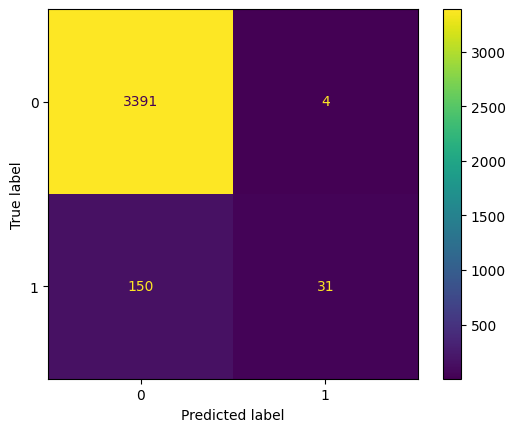

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=svccm, display_labels=svm_model.classes_)
conf_matrix.plot()
plt.show()

#### Random Forest Classifier

In [ ]:
randomforest = RandomForestClassifier()
randomforest.fit(X_train_scaled, y_train)
randomforest_y_pred = randomforest.predict(X_test_scaled)
randomforest_a = accuracy_score(y_test, randomforest_y_pred)
print(f"Accuracy = {randomforest_a}")
print(f"Precision Score = {precision_score(y_test, randomforest_y_pred, average='weighted')}")
print(f"Recall Score {recall_score(y_test, randomforest_y_pred, average='weighted')}")

Accuracy = 0.9821029082774049
Precision Score = 0.9817667119019488
Recall Score 0.9821029082774049


In [ ]:
print("Classification Report:")
print(classification_report(y_test, randomforest_y_pred))
print("Confusion Matrix:")
rfcm = confusion_matrix(y_test, randomforest_y_pred)
print(rfcm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3395
           1       0.96      0.67      0.79       181

    accuracy                           0.98      3576
   macro avg       0.97      0.84      0.89      3576
weighted avg       0.98      0.98      0.98      3576

Confusion Matrix:
[[3390    5]
 [  59  122]]


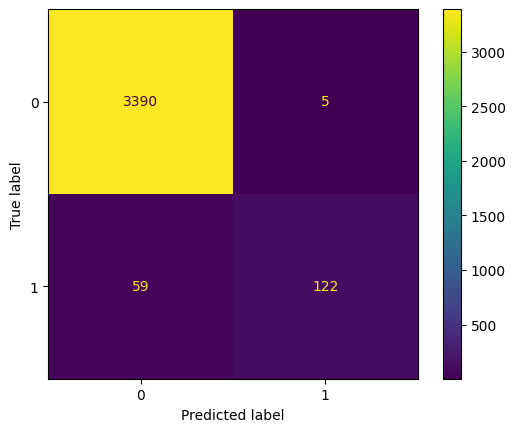

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=rfcm, display_labels=randomforest.classes_)
conf_matrix.plot()
plt.show()

#### Logistic Regression

In [ ]:
lr = LogisticRegression(max_iter=300)
lr.fit(X_train_scaled, y_train)
lr_y_pred = lr.predict(X_test_scaled)
lr_a = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy = {lr_a}")
print(f"Precision Score = {precision_score(y_test, lr_y_pred, average='weighted', zero_division=1)}")
print(f"Recall Score = {recall_score(y_test, lr_y_pred, average='weighted', zero_division=1)}")

Accuracy = 0.9519015659955258
Precision Score = 0.9498601040954459
Recall Score = 0.9519015659955258


In [ ]:
print("Classification Report:")
print(classification_report(y_test, lr_y_pred, zero_division=1))
print("Confusion Matrix:")
lrcm = confusion_matrix(y_test, lr_y_pred)
print(lrcm)

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3395
           1       0.91      0.06      0.10       181

    accuracy                           0.95      3576
   macro avg       0.93      0.53      0.54      3576
weighted avg       0.95      0.95      0.93      3576

Confusion Matrix:
[[3394    1]
 [ 171   10]]


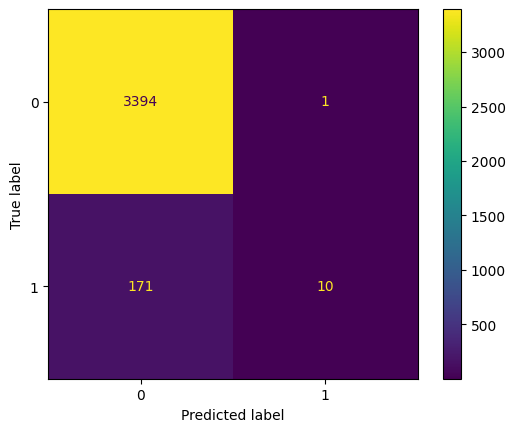

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=lrcm, display_labels=svm_model.classes_)
conf_matrix.plot()
plt.show()

#### Nearest Centroid

In [ ]:
nc = NearestCentroid()
nc.fit(X_train_scaled, y_train)
nc_y_pred = nc.predict(X_test_scaled)
nc_a = accuracy_score(y_test, nc_y_pred)
print(f"Accuracy = {nc_a}")
print(f"Precision Score = {precision_score(y_test, nc_y_pred, average='weighted')}")
print(f"Recall Score = {recall_score(y_test, nc_y_pred, average='weighted')}")

Accuracy = 0.7796420581655481
Precision Score = 0.9375908220857845
Recall Score = 0.7796420581655481


In [ ]:
print("Classification Report:")
print(classification_report(y_test, nc_y_pred))
print("Confusion Matrix:")
nccm = confusion_matrix(y_test, nc_y_pred)
print(nccm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      3395
           1       0.15      0.70      0.24       181

    accuracy                           0.78      3576
   macro avg       0.56      0.74      0.56      3576
weighted avg       0.94      0.78      0.84      3576

Confusion Matrix:
[[2662  733]
 [  55  126]]


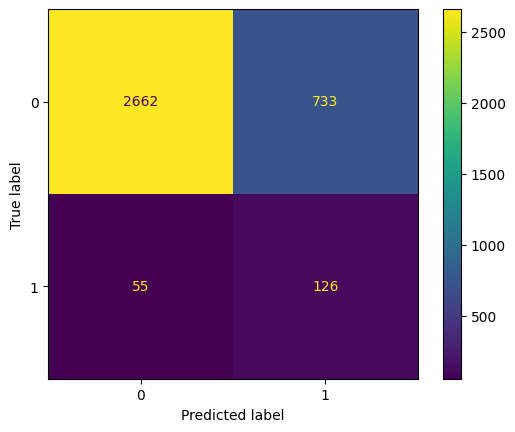

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=nccm, display_labels=nc.classes_)
conf_matrix.plot()
plt.show()

#### Decision Tree

In [ ]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X_train_scaled, y_train)
tree_y_pred = tree_model.predict(X_test_scaled)
tree_a = accuracy_score(y_test, tree_y_pred)
print(f"Accuracy = {tree_a}")
print(f"Precision Score = {precision_score(y_test, tree_y_pred, average='weighted')}")
print(f"Recall Score = {recall_score(y_test, tree_y_pred, average='weighted')}")

Accuracy = 0.9650447427293065
Precision Score = 0.9660823684690688
Recall Score = 0.9650447427293065


In [ ]:
print("Classification Report:")
print(classification_report(y_test, tree_y_pred))
print("Confusion Matrix:")
dtcm = confusion_matrix(y_test, tree_y_pred)
print(dtcm)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3395
           1       0.65      0.69      0.66       181

    accuracy                           0.97      3576
   macro avg       0.81      0.83      0.82      3576
weighted avg       0.97      0.97      0.97      3576

Confusion Matrix:
[[3327   68]
 [  57  124]]


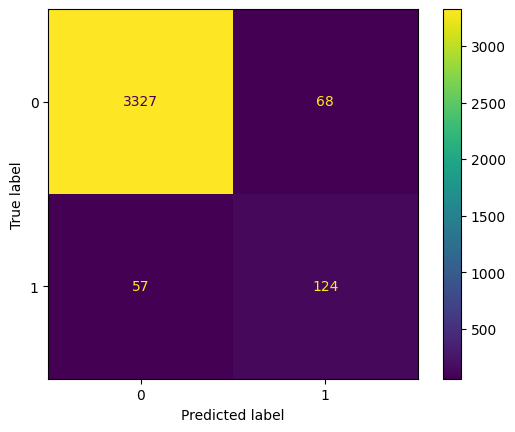

In [ ]:
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=dtcm, display_labels=tree_model.classes_)
conf_matrix.plot()
plt.show()

#### Comparison between models

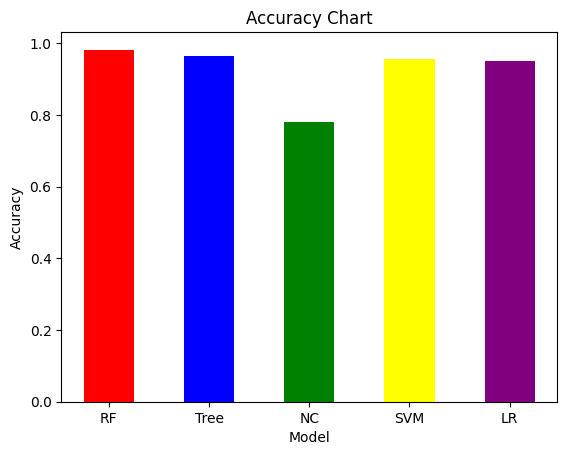

In [ ]:
y_ax = [randomforest_a, tree_a, nc_a,  svm_model_a, lr_a]
x_ax = ["RF", "Tree", "NC", "SVM", "LR"]
left = [1, 2, 3, 4, 5]
plt.bar(left, y_ax, tick_label = x_ax, width = 0.5, color = ["red", "blue", "green", "yellow", "purple"])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Chart')
plt.show()